# ocrobin

Automatic binarization using deep learning.

This implements a grayscale-to-binary pixel-for-pixel transformation. The models it is usually used with perform some denoising and deblurring, but they are small enough not to contain any significant shape priors. The use of 2D LSTMs in the binarization model allows for some modeling of global noise and intensity properties.

# Inference

In [1]:
%pylab inline
rc("image", cmap="gray", interpolation="bicubic")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import ocrobin
bm = ocrobin.Binarizer("bin-000000046-005393.pt")
bm.model

Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU()
  (3): LSTM2(
    (hlstm): RowwiseLSTM(
      (lstm): LSTM(8, 4, bidirectional=1)
    )
    (vlstm): RowwiseLSTM(
      (lstm): LSTM(8, 4, bidirectional=1)
    )
  )
  (4): Conv2d(8, 1, kernel_size=(1, 1), stride=(1, 1))
  (5): Sigmoid()
)

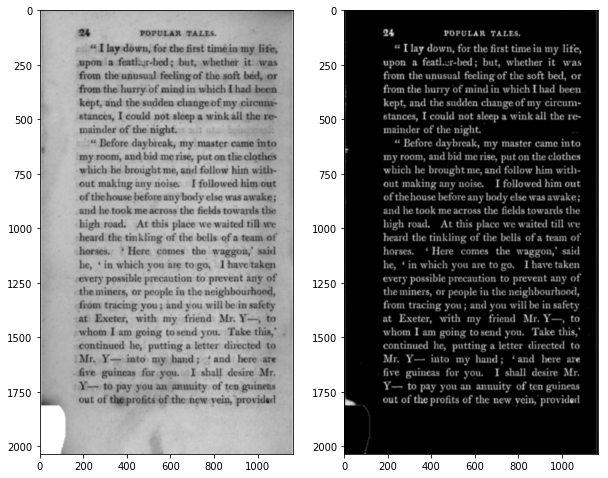

In [3]:
figsize(10, 10)
image = mean(imread("testdata/sample.png")[:, :, :3], 2)
binary = bm.binarize(image)
subplot(121); imshow(image)
subplot(122); imshow(binary)

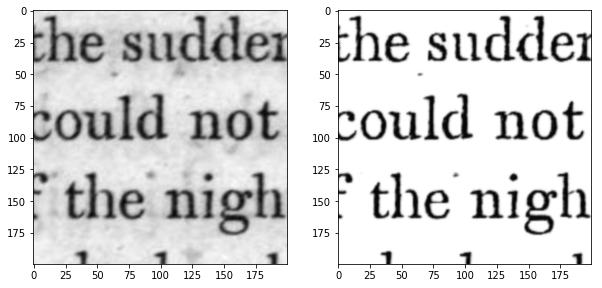

In [4]:
subplot(121); imshow(image[400:600, 400:600])
subplot(122); imshow(1-binary[400:600, 400:600])

# Training

Training data for `ocrobin-train` is stored in tarfiles, with binary images and corresponding grayscale images.

In [5]:
%%bash
tar -ztvf testdata/bindata.tgz | sed 5q

drwxrwxr-x tmb/tmb           0 2018-04-17 10:27 ./
-rw-rw-r-- tmb/tmb      391766 2018-04-10 09:35 ./A001BIN.bin.png
-rw-rw-r-- tmb/tmb     6021129 2018-04-10 09:35 ./A001BIN.gray.png
-rw-rw-r-- tmb/tmb      226629 2018-04-10 09:36 ./A002BIN.bin.png
-rw-rw-r-- tmb/tmb     2685607 2018-04-10 09:36 ./A002BIN.gray.png


tar: write error


The training data is actually artificially generated; document image degradation for this kind of training works quite well at simulating real data.

In [ ]:
from dlinputs import tarrecords
sample = tarrecords.tariterator(open("testdata/bindata.tgz")).next()
sample["__key__"]
subplot(121); imshow(sample["gray.png"])
subplot(122); imshow(sample["bin.png"])

You can use the `ocrobin-train` binary to carry out the training.

In [ ]:
%%bash
./ocrobin-train -d testdata/bindata.tgz -o temp